In [1]:
import pandas as pd
import os

data_folder = data_folder = "C:/Users/admin/anaconda3/16056002/data"



data = pd.DataFrame()

for file in os.listdir(data_folder):
    if file.endswith('.csv'):
        company_name = file.split('.')[0]  
        df = pd.read_csv(os.path.join(data_folder, file))
        
        df['Date'] = pd.to_datetime(df['Date'])
        df.set_index('Date', inplace=True)
        
        data[company_name] = df['Close']
        
    print(data.head())

Empty DataFrame
Columns: []
Index: []
               CDW
Date              
2017-01-03  47.195
2017-01-04  47.964
2017-01-05  47.497
2017-01-06  47.332
2017-01-09  46.856
               CDW      EFX
Date                       
2017-01-03  47.195  110.117
2017-01-04  47.964  110.655
2017-01-05  47.497  111.248
2017-01-06  47.332  112.194
2017-01-09  46.856  111.118
               CDW      EFX      NOC
Date                                
2017-01-03  47.195  110.117  207.601
2017-01-04  47.964  110.655  207.919
2017-01-05  47.497  111.248  208.573
2017-01-06  47.332  112.194  209.227
2017-01-09  46.856  111.118  208.414
               CDW      EFX      NOC
Date                                
2017-01-03  47.195  110.117  207.601
2017-01-04  47.964  110.655  207.919
2017-01-05  47.497  111.248  208.573
2017-01-06  47.332  112.194  209.227
2017-01-09  46.856  111.118  208.414
               CDW      EFX      NOC    WELL
Date                                        
2017-01-03  47.195  110.1

In [2]:
import os
print(os.getcwd()) 


C:\Users\admin\anaconda3\16056002\data


In [3]:
for file in os.listdir(data_folder):
    if file.endswith('.csv'):
        company_name = file.split('.')[0]
        df = pd.read_csv(os.path.join(data_folder, file))
        
        no_diff = (df['Open'] == df['Close']).all()
        print(f"{company_name}: Open and Close are the same - {no_diff}")


CDW: Open and Close are the same - False
EFX: Open and Close are the same - False
NOC: Open and Close are the same - False
WELL: Open and Close are the same - False
WTW: Open and Close are the same - False


In [4]:
max_values = data.max()
min_values = data.min()

print("Highest closing prices per company:")
print(max_values)

print("\nLowest closing prices per company:")
print(min_values)

Highest closing prices per company:
CDW     201.603
EFX     290.801
NOC     531.691
WELL     91.002
WTW     257.205
dtype: float64

Lowest closing prices per company:
CDW      46.737
EFX      85.604
NOC     200.592
WELL     28.506
WTW     109.706
dtype: float64


In [5]:
import numpy as np

log_returns = np.log(data / data.shift(1))

log_return_stats = log_returns.describe()

print("Log return statistics:")
print(log_return_stats)

Log return statistics:
               CDW          EFX          NOC         WELL          WTW
count  1509.000000  1509.000000  1509.000000  1509.000000  1509.000000
mean      0.000869     0.000368     0.000621     0.000167     0.000511
std       0.019595     0.020024     0.016904     0.023490     0.016019
min      -0.152526    -0.159927    -0.106988    -0.279655    -0.096784
25%      -0.007721    -0.007484    -0.006689    -0.008411    -0.006390
50%       0.001391     0.001161     0.000978     0.001207     0.000907
75%       0.010295     0.009625     0.008533     0.009457     0.007975
max       0.114651     0.139246     0.122231     0.208485     0.140684


In [6]:
max_gain = log_returns.idxmax()
max_loss = log_returns.idxmin()

print("Dates of highest gains per company:")
print(max_gain)

print("\nDates of highest losses per company:")
print(max_loss)


Dates of highest gains per company:
CDW    2018-10-31
EFX    2021-04-22
NOC    2020-03-17
WELL   2020-03-19
WTW    2020-03-24
dtype: datetime64[ns]

Dates of highest losses per company:
CDW    2020-03-16
EFX    2018-10-25
NOC    2020-03-16
WELL   2020-03-16
WTW    2020-03-18
dtype: datetime64[ns]


In [7]:
weekly_volume = pd.DataFrame()

for file in os.listdir(data_folder):
    if file.endswith('.csv'):
        df = pd.read_csv(os.path.join(data_folder, file))
        df['Date'] = pd.to_datetime(df['Date'])
        df.set_index('Date', inplace=True)
        
        weekly_avg = df['Volume'].resample('W').mean()
        company_name = file.split('.')[0]
        weekly_volume[company_name] = weekly_avg

print("Weekly average trading volume:")
print(weekly_volume)


Weekly average trading volume:
                  CDW        EFX        NOC       WELL       WTW
Date                                                            
2017-01-08   738500.0   697775.0   838350.0  2073075.0  665700.0
2017-01-15   509620.0   570740.0  1074720.0  2113560.0  575020.0
2017-01-22   480775.0   961975.0   918450.0  1823625.0  644775.0
2017-01-29   689300.0   772160.0  1466780.0  1645060.0  594800.0
2017-02-05  1046820.0   650620.0  1225840.0  1879300.0  780820.0
...               ...        ...        ...        ...       ...
2022-12-04   904040.0   801480.0   614840.0  4168360.0  651020.0
2022-12-11   443080.0   732540.0   559800.0  4685300.0  516560.0
2022-12-18   760340.0  1068540.0   776460.0  4298820.0  818520.0
2022-12-25   491000.0   510100.0   570920.0  1891420.0  391740.0
2023-01-01   422300.0   333925.0   556100.0  1504500.0  243100.0

[313 rows x 5 columns]


In [8]:
total_returns = log_returns.sum()
highest_return_company = total_returns.idxmax()

print(f"Company with highest total return: {highest_return_company}")

Company with highest total return: CDW


In [9]:
for file in os.listdir(data_folder):
    if file.endswith('.csv'):
        df = pd.read_csv(os.path.join(data_folder, file))
        volume_quartiles = pd.qcut(df['Volume'], 4, labels=['Low', 'Medium', 'High', 'Very High'])
        df['Volume_Class'] = volume_quartiles
        print(f"{file} Volume categories:")
        print(df[['Volume', 'Volume_Class']].head())

CDW.csv Volume categories:
    Volume Volume_Class
0   807200         High
1  1036200    Very High
2   571200          Low
3   539400          Low
4   483300          Low
EFX.csv Volume categories:
   Volume Volume_Class
0  766800         High
1  894800         High
2  553000          Low
3  576500       Medium
4  759500       Medium
NOC.csv Volume categories:
    Volume Volume_Class
0  1178900    Very High
1   664100       Medium
2   891200         High
3   619200          Low
4   703600       Medium
WELL.csv Volume categories:
    Volume Volume_Class
0  2085000       Medium
1  2070700       Medium
2  2228000         High
3  1908600       Medium
4  1806600       Medium
WTW.csv Volume categories:
   Volume Volume_Class
0  789800         High
1  477200          Low
2  583600       Medium
3  812200         High
4  467800          Low


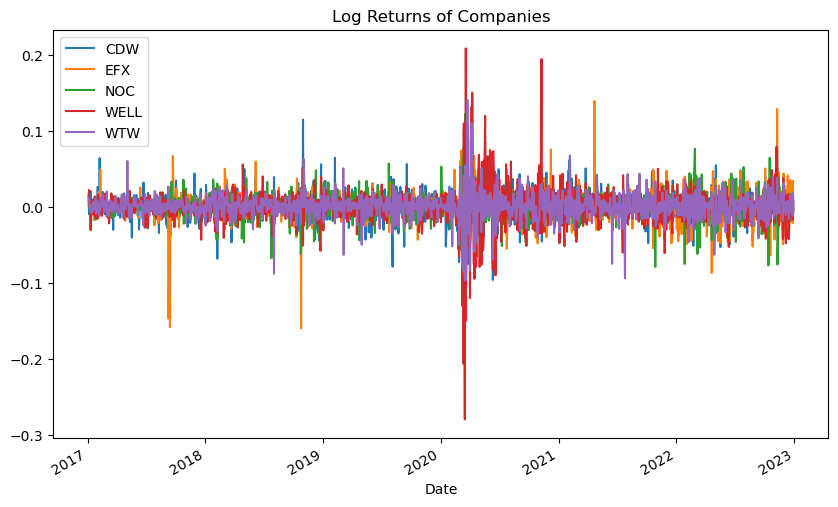

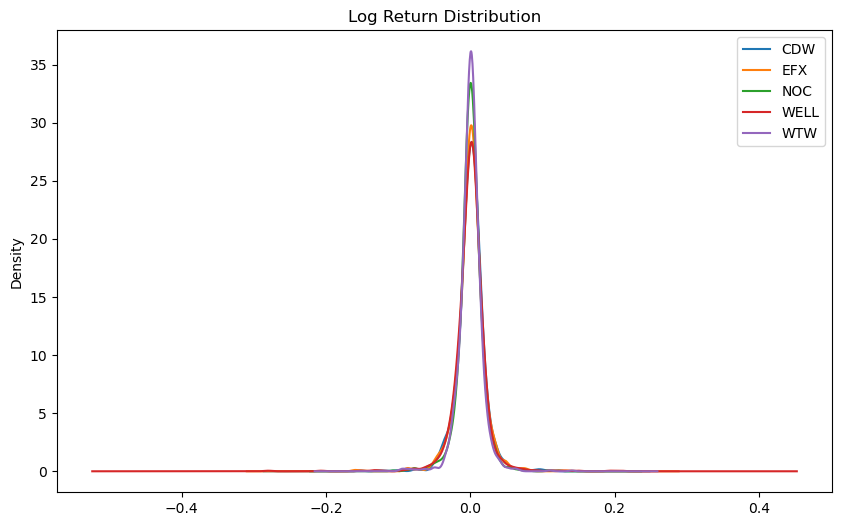

In [10]:
import matplotlib.pyplot as plt

log_returns.plot(title="Log Returns of Companies", figsize=(10, 6))
plt.show()

log_returns.plot(kind='density', title="Log Return Distribution", figsize=(10, 6))
plt.show()

In [11]:
import pandas as pd

url = "https://ies-fsv.s3.eu-central-1.amazonaws.com/companies/companies_no_subindustry.csv"
data = pd.read_csv(url)

print(data.head())
print(data.info())


  Symbol     Security  GICS_Sector                       hq    included  \
0    MMM           3M  Industrials    Saint Paul, Minnesota  09.08.1976   
1    AOS  A. O. Smith  Industrials     Milwaukee, Wisconsin  26.07.2017   
2    ABT       Abbott  Health Care  North Chicago, Illinois  31.03.1964   
3   ABBV       AbbVie  Health Care  North Chicago, Illinois  31.12.2012   
4   ABMD      Abiomed  Health Care   Danvers, Massachusetts  31.05.2018   

       Founded  
0         1902  
1         1916  
2         1888  
3  2013 (1888)  
4         1981  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Symbol       503 non-null    object
 1   Security     503 non-null    object
 2   GICS_Sector  503 non-null    object
 3   hq           503 non-null    object
 4   included     458 non-null    object
 5   Founded      503 non-null    object
dtypes: object(

In [12]:
missing_included = data['included'].isna().sum()
print(f"Number of companies without 'included' date: {missing_included}")


Number of companies without 'included' date: 45


In [13]:
from datetime import datetime

data_cleaned = data.dropna(subset=['included'])

data_cleaned['included'] = pd.to_datetime(data_cleaned['included'], dayfirst=True, errors='coerce')

current_date = datetime.now()
data_cleaned['age'] = (current_date - data_cleaned['included']).dt.days / 365  # 转换为年

youngest_company = data_cleaned.loc[data_cleaned['age'].idxmin()]
oldest_company = data_cleaned.loc[data_cleaned['age'].idxmax()]
average_age = data_cleaned['age'].mean()

print(f"Youngest company:\n{youngest_company}")
print(f"Oldest company:\n{oldest_company}")
print(f"Average age of companies: {average_age:.2f} years")


Youngest company:
Symbol                        ACGL
Security        Arch Capital Group
GICS_Sector             Financials
hq               Hamilton, Bermuda
included       2022-11-01 00:00:00
Founded                       1995
age                       2.068493
Name: 48, dtype: object
Oldest company:
Symbol                          MO
Security                    Altria
GICS_Sector       Consumer Staples
hq              Richmond, Virginia
included       1957-03-04 00:00:00
Founded                       1985
age                      67.775342
Name: 25, dtype: object
Average age of companies: 23.48 years


C:\Users\admin\AppData\Local\Temp\ipykernel_40920\3330654541.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['included'] = pd.to_datetime(data_cleaned['included'], dayfirst=True, errors='coerce')
C:\Users\admin\AppData\Local\Temp\ipykernel_40920\3330654541.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['age'] = (current_date - data_cleaned['included']).dt.days / 365  # 转换为年


GICS_Sector
Information Technology    68
Industrials               66
Health Care               60
Financials                55
Consumer Discretionary    52
Consumer Staples          33
Real Estate               30
Materials                 26
Communication Services    23
Utilities                 23
Energy                    22
Name: count, dtype: int64


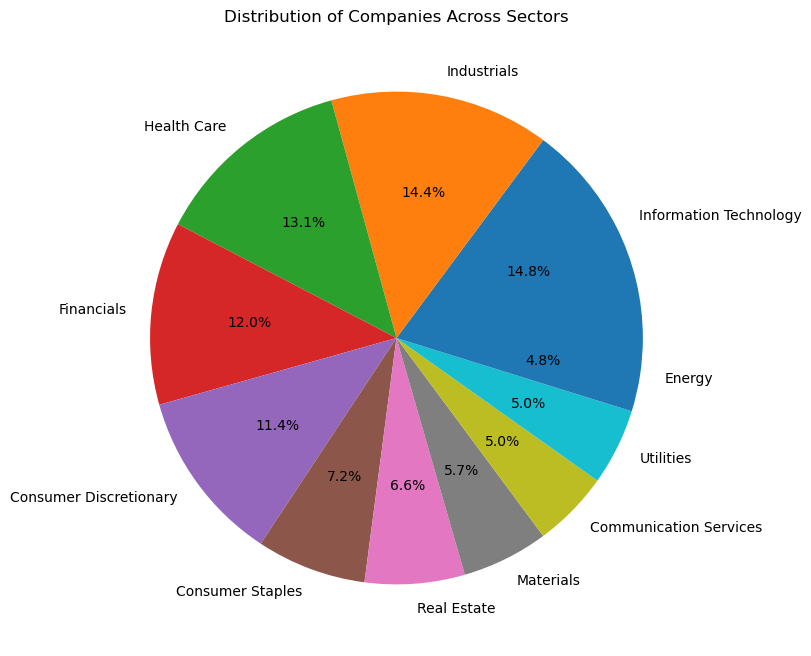

In [14]:
import matplotlib.pyplot as plt

if 'GICS_Sector' in data_cleaned.columns:
    sector_distribution = data_cleaned['GICS_Sector'].value_counts()
    print(sector_distribution)

    sector_distribution.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8))
    plt.title("Distribution of Companies Across Sectors")
    plt.ylabel("")  
    plt.show()
else:
    print("Column 'sector' does not exist in the dataset.")


In [15]:
data_cleaned['state'] = data_cleaned['hq'].str[-2:]

state_distribution = data_cleaned['state'].value_counts()

print("Company distribution by state:")
print(state_distribution)

Company distribution by state:
state
ia    115
as     44
rk     44
is     31
na     30
da     21
nd     19
ts     18
io     17
ey     15
ut     13
ta     13
on     13
an     10
ee      8
do      7
ri      6
in      6
ma      6
om      4
ds      3
ho      2
ka      2
ky      2
re      2
ah      2
wa      1
UK      1
ne      1
C.      1
el      1
Name: count, dtype: int64


C:\Users\admin\AppData\Local\Temp\ipykernel_40920\3059194958.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['state'] = data_cleaned['hq'].str[-2:]


In [16]:
subindustry_url = "https://ies-fsv.s3.eu-central-1.amazonaws.com/companies/companies_subindustry.csv"
subindustry_data = pd.read_csv(subindustry_url)

merged_data = pd.merge(data_cleaned, subindustry_data, on=['ticker'], how=['inner'])

consumer_discretionary = merged_data[merged_data['sector'] == "Consumer Discretionary"]
subindustry_distribution = consumer_discretionary['subindustry'].value_counts()

print("subindustry distribution in 'Consumer Discretionary' sector:")
print(subindustry_distribution)

KeyError: 'ticker'